In [1]:
upstream = ['dataCollect']
product = None

In [2]:
# Parameters
upstream = {"dataCollect": {"nb": "C:\\Users\\yosty\\Desktop\\Desktop_Folder\\14 - git\\timeSeriesDOTS\\ploomber\\dots\\00-data\\dataCollect.ipynb", "files": "C:\\Users\\yosty\\Desktop\\Desktop_Folder\\14 - git\\timeSeriesDOTS\\ploomber\\dots\\00-data\\raw", "DOTS": "C:\\Users\\yosty\\Desktop\\Desktop_Folder\\14 - git\\timeSeriesDOTS\\ploomber\\dots\\00-data\\clean\\DOTS.csv"}}
product = {"nb": "C:\\Users\\yosty\\Desktop\\Desktop_Folder\\14 - git\\timeSeriesDOTS\\ploomber\\dots\\00-data\\createTimeSeries.ipynb", "dotsTimeSeries": "C:\\Users\\yosty\\Desktop\\Desktop_Folder\\14 - git\\timeSeriesDOTS\\ploomber\\dots\\00-data\\clean\\dotsTimeSeries.csv"}


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:

rawData=pd.read_csv(upstream['dataCollect']['DOTS'])
keepCols=['series_code', 'period', 'value', 'REF_AREA', 'INDICATOR', 'COUNTERPART_AREA', 'Reference Area', 'Counterpart Reference Area']
cleanData = rawData[keepCols]
cleanData.rename(columns={'Counterpart Reference Area':'CounterpartReferenceArea',
        'Reference Area':'ReferenceArea'}, inplace=True)
wideData = (cleanData
    .pivot_table(
        index=['period', 'CounterpartReferenceArea'],
        columns='ReferenceArea',
        values='value'))

# remove groups
# decided to keep 'Special Categories and Economic Zones' - sounds interesting
# and wouldn't cause overlap to include i think
removeList = [
'Export earnings: fuel',
'Export earnings: nonfuel',
'Middle East, North Africa, Afghanistan, and Pakistan',
'Emerging and Developing Europe',
'Western Hemisphere',
'Western Hemisphere not allocated',
'EU (Member States and Institutions of the European Union) changing composition',
'Euro Area (Member States and Institutions of the Euro Area) changing composition',
'Europe',
'Europe not allocated',
'Africa',
'Africa not allocated',
'Sub-Saharan Africa',
'Middle East',
'Middle East and Central Asia not specified',
'Other Countries n.i.e. (IMF)',
'Advanced Economies (IMF)',
'Emerging and Developing Countries',
'Developing Asia (IMF)',
'Middle East and Central Asia',
'Belgo-Luxembourg Economic Union',
'Community of Independent States (CIS)',
'Asia not allocated',
'Former U.S.S.R.',
'All Countries, excluding the IO']

dataLong = (wideData
    .melt(ignore_index=False)
    .query('CounterpartReferenceArea not in @removeList')
    .query('ReferenceArea not in @removeList')
)


dataLong.reset_index(inplace=True)
dataLong['period'] = pd.to_datetime(dataLong['period'])

wideData2 = dataLong.pivot_table(index=['period', 'CounterpartReferenceArea'],
                                columns='ReferenceArea',
                                values='value')



C:\Users\yosty\AppData\Local\Temp\ipykernel_29664\227252832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData.rename(columns={'Counterpart Reference Area':'CounterpartReferenceArea',


In [5]:

# nanData=dataLong['value'].isna().groupby([dataLong['period'], dataLong['ReferenceArea']]).sum()

# nanData=pd.DataFrame(nanData).reset_index()

# nanData=nanData.pivot_table(index='period', columns='ReferenceArea', values='value')

# #nanData=nanData[nanData.index > "1990-01-01"]

# nanData=nanData / dataLong['CounterpartReferenceArea'].nunique()


# inputData=nanData
# ncols=2
# width=10
# length=100

# from math import ceil

# nrows = ceil(len(inputData.columns) / ncols)

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, dpi=120, figsize=(width,length))
# for i, ax in enumerate(axes.flatten()):
#     if i > len(inputData.columns):
#         pass
#     else:
#         data = inputData[inputData.columns[i]]
#         ax.plot(data, color='red', linewidth=1)
#         # Decorations
#         ax.set_title(inputData.columns[i])
#         ax.xaxis.set_ticks_position('none')
#         ax.get_xaxis().set_visible(False)
#         ax.yaxis.set_ticks_position('none')
#         ax.spines["top"].set_alpha(0)
#         ax.tick_params(labelsize=6)

# plt.tight_layout()

In [6]:


nanData=dataLong['value'].isna().groupby([dataLong['period'], dataLong['ReferenceArea']]).sum()

nanData=pd.DataFrame(nanData).reset_index()

nanData=nanData.pivot_table(index='period', columns='ReferenceArea', values='value')

totalNans=nanData.values.sum()

totalCombo=dataLong['CounterpartReferenceArea'].nunique() * dataLong['ReferenceArea'].nunique()

results={}
for col in nanData:

    temp=dataLong[dataLong['ReferenceArea']!=col]
    tempNanData=temp['value'].isna().groupby([dataLong['period'], dataLong['ReferenceArea']]).sum()

    results[col] = totalNans-tempNanData.values.sum()
    print(col, ' : ',totalNans-tempNanData.values.sum())

tenLargestMissing=pd.DataFrame(sorted(results.items(), key=lambda item: item[1])).tail(10)

removeEcons=[econ for econ in tenLargestMissing[0]]

Afghanistan  :  121890


Albania  :  112737


Algeria  :  102653


American Samoa  :  126094


Angola  :  114384


Anguilla  :  129402


Antigua and Barbuda  :  121372


Argentina  :  57919


Armenia  :  119209


Aruba  :  130638


Australia  :  46440


Austria  :  37934


Azerbaijan  :  114979


Bahamas  :  105972


Bahrain  :  95752


Bangladesh  :  91085


Barbados  :  101178


Belarus  :  99862


Belgium  :  80208


Belize  :  121854


Benin  :  111267


Bermuda  :  120558


Bhutan  :  129858


Bolivia  :  109946


Bosnia and Herzegovina  :  108158


Botswana  :  117443


Brazil  :  42375


Brunei Darussalam  :  119709


Bulgaria  :  78471


Burkina Faso  :  116394


Burundi  :  124727


Cabo Verde  :  127740


Cambodia  :  99060


Cameroon  :  98699


Canada  :  34553


Central African Republic  :  119954


Chad  :  118452


Chile  :  90993


China  :  52676


Colombia  :  71372


Comoros  :  129148


Congo  :  105796


Congo, the Democratic Republic of the  :  111209


Costa Rica  :  83208


Cote d`Ivoire  :  89148


Croatia  :  102740


Cuba  :  90424


Curacao  :  131923


Cyprus  :  81781


Czech Republic  :  84693


Denmark  :  19583


Djibouti  :  116859


Dominica  :  115252


Dominican Republic  :  93809


East Germany  :  126924


Ecuador  :  89194


Egypt  :  68175


El Salvador  :  108822


Equatorial Guinea  :  124571


Eritrea  :  126258


Estonia  :  100853


Eswatini  :  118620


Ethiopia  :  101584


Falkland Islands (Malvinas)  :  131101


Faroe Islands  :  114957


Fiji  :  104804


Finland  :  43421


Former Czechoslovakia  :  122225


Former Yugoslavia  :  108597


France  :  14627


French Polynesia  :  125463


Gabon  :  99561


Gambia  :  118482


Georgia  :  115713


Germany  :  18641


Ghana  :  82820


Gibraltar  :  122896


Greece  :  57267


Greenland  :  126418


Grenada  :  120670


Guam  :  129091


Guatemala  :  94663


Guinea  :  109132


Guinea-Bissau  :  128292


Guyana  :  101978


Haiti  :  106355


Holy See (Vatican City State)  :  132405


Honduras  :  109282


Hong Kong, China  :  34229


Hungary  :  79279


Iceland  :  103414


India  :  33459


Indonesia  :  61733


Iran, Islamic Republic of  :  83518


Iraq  :  109080


Ireland  :  45463


Israel  :  80300


Italy  :  17223


Jamaica  :  94608


Japan  :  15892


Jordan  :  95337


Kazakhstan  :  103404


Kenya  :  67648


Kiribati  :  135754


Korea, Democratic People`s Republic of  :  89670


Korea, Republic of  :  48496


Kosovo, Republic of  :  129498


Kuwait  :  99897


Kyrgyzstan  :  119851


Lao People`s Democratic Republic  :  111072


Latvia  :  97513


Lebanon  :  86025


Lesotho  :  130119


Liberia  :  124698


Libya  :  112542


Lithuania  :  95029


Luxembourg  :  96064


Macao  :  112664


Madagascar  :  91146


Malawi  :  101325


Malaysia  :  57361


Maldives  :  127154


Mali  :  105220


Malta  :  97137


Marshall islands  :  131982


Mauritania  :  112922


Mauritius  :  99417


Mexico  :  73571


Micronesia, Federated States of  :  134777


Moldova, Republic of  :  110185


Mongolia  :  120114


Montenegro  :  128119


Montserrat  :  131784


Morocco  :  73614


Mozambique  :  106738


Myanmar  :  100537


Nauru  :  129675


Nepal  :  103878


Netherlands  :  14932


Netherlands Antilles  :  106398


New Caledonia  :  116807


New Zealand  :  69977


Nicaragua  :  114249


Niger  :  114944


Nigeria  :  91965


North Macedonia, Republic of   :  107948


Norway  :  43049


Oman  :  90686


Pakistan  :  52337


Palau  :  134292


Palestine, State of  :  126539


Panama  :  109529


Papua New Guinea  :  105971


Paraguay  :  109357


Peru  :  79196


Philippines  :  75302


Poland  :  63634


Portugal  :  49464


Qatar  :  96521


Romania  :  78241


Russian Federation  :  87300


Rwanda  :  115743


Saint Kitts and Nevis  :  123565


Saint Lucia  :  118766


Saint Vincent and the Grenadines  :  123334


Samoa  :  126738


San Marino  :  124999


Sao Tome and Principe  :  127455


Saudi Arabia  :  82486


Senegal  :  96619


Serbia  :  114468


Serbia and Montenegro  :  126673


Seychelles  :  119447


Sierra Leone  :  114380


Singapore  :  62778


Sint Maarten (Dutch part)  :  136669


Slovakia  :  87786


Slovenia  :  92371


Solomon Islands  :  123751


Somalia  :  116565


South Africa  :  89417


South African Common Customs Area (SACCA)  :  114013


South Sudan  :  137316


Spain  :  31418


Sri Lanka  :  78287


Sudan  :  111246


Suriname  :  113646


Sweden  :  29900


Switzerland  :  26864


Syrian Arab Republic  :  109376


Tajikistan  :  121349


Tanzania, United Republic of  :  80430


Thailand  :  53792


Timor-Leste  :  129296


Togo  :  108890


Tonga  :  130678


Trinidad and Tobago  :  91603


Tunisia  :  83413


Turkey  :  60543


Turkmenistan  :  119653


Tuvalu  :  133495


Uganda  :  106865


Ukraine  :  90056


United Arab Emirates  :  73493


United Kingdom  :  10591


United States  :  22753


Uruguay  :  88936


Uzbekistan  :  119343


Vanuatu  :  120673


Venezuela, Bolivarian Republic  :  95347


Viet Nam  :  99267


Yemen  :  115849


Yemen Arab Rep.  :  135949


Yemen, P.D. Rep.  :  135627


Zambia  :  107579


Zimbabwe  :  89474


In [7]:

# nanData=dataLong['value'].isna().groupby([dataLong['period'], dataLong['ReferenceArea']]).sum()

# nanData=pd.DataFrame(nanData).reset_index()

# nanData=nanData.pivot_table(index='period', columns='ReferenceArea', values='value')

# nanData=nanData / dataLong['CounterpartReferenceArea'].nunique()

# for col in nanData:
#     # https://stackoverflow.com/a/49573439/11706269
#     plt.plot(nanData[[col]])
#     ax=plt.gca()
#     ax.xaxis.set_major_locator(mdates.YearLocator(10))
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# ax.set_title('percent of data missing')

In [8]:

largestMissing=pd.DataFrame(sorted(results.items(), key=lambda item: item[1])).tail(100)
removeEcons=[econ for econ in largestMissing[0]]

tempLong=dataLong[~dataLong['CounterpartReferenceArea'].isin(removeEcons)]
tempLong=tempLong[~tempLong['ReferenceArea'].isin(removeEcons)]

(742, 349)


(741, 350)


(740, 350)


(739, 351)


(738, 351)


(737, 353)


(736, 357)


(735, 365)


(734, 366)


(733, 368)


(732, 369)


(731, 373)


(730, 373)


(729, 373)


(728, 373)


(727, 373)


(726, 374)


(725, 374)


(724, 375)


(723, 375)


(722, 376)


(721, 376)


(720, 377)


(719, 382)


(718, 493)


(717, 493)


(716, 494)


(715, 495)


(714, 496)


(713, 497)


(712, 499)


(711, 500)


(710, 501)


(709, 501)


(708, 504)


(707, 506)


(706, 509)


(705, 510)


(704, 529)


(703, 532)


(702, 535)


(701, 536)


(700, 536)


(699, 538)


(698, 540)


(697, 540)


(696, 542)


(695, 544)


(694, 545)


(693, 546)


(692, 650)


(691, 652)


(690, 655)


(689, 657)


(688, 658)


(687, 661)


(686, 663)


(685, 667)


(684, 671)


(683, 681)


(682, 685)


(681, 687)


(680, 688)


(679, 689)


(678, 690)


(677, 691)


(676, 696)


(675, 698)


(674, 701)


(673, 703)


(672, 705)


(671, 722)


(670, 726)


(669, 728)


(668, 729)


(667, 731)


(666, 732)


(665, 732)


(664, 733)


(663, 738)


(662, 739)


(661, 739)


(660, 739)


(659, 739)


(658, 741)


(657, 744)


(656, 746)


(655, 747)


(654, 747)


(653, 773)


(652, 774)


(651, 776)


(650, 783)


(649, 784)


(648, 785)


(647, 793)


(646, 796)


(645, 800)


(644, 805)


(643, 808)


(642, 812)


(641, 814)


(640, 820)


(639, 824)


(638, 828)


(637, 829)


(636, 829)


(635, 846)


(634, 854)


(633, 857)


(632, 893)


(631, 897)


(630, 903)


(629, 912)


(628, 920)


(627, 934)


(626, 941)


(625, 965)


(624, 977)


(623, 988)


(622, 991)


(621, 991)


(620, 992)


(619, 994)


(618, 995)


(617, 998)


(616, 998)


(615, 999)


(614, 1000)


(613, 1001)


(612, 1004)


(611, 1039)


(610, 1042)


(609, 1042)


(608, 1050)


(607, 1052)


(606, 1052)


(605, 1054)


(604, 1054)


(603, 1057)


(602, 1059)


(601, 1062)


(600, 1062)


(599, 1072)


(598, 1073)


(597, 1074)


(596, 1074)


(595, 1075)


(594, 1075)


(593, 1076)


(592, 1076)


(591, 1078)


(590, 1078)


(589, 1079)


(588, 1081)


(587, 1112)


(586, 1120)


(585, 1121)


(584, 1145)


(583, 1149)


(582, 1150)


(581, 1151)


(580, 1151)


(579, 1154)


(578, 1156)


(577, 1158)


(576, 1161)


(575, 1170)


(574, 1174)


(573, 1176)


(572, 1180)


(571, 1180)


(570, 1182)


(569, 1185)


(568, 1187)


(567, 1190)


(566, 1193)


(565, 1194)


(564, 1195)


(563, 1233)


(562, 1240)


(561, 1241)


(560, 1243)


(559, 1246)


(558, 1248)


(557, 1250)


(556, 1251)


(555, 1256)


(554, 1258)


(553, 1261)


(552, 1262)


(551, 1288)


(550, 1291)


(549, 1296)


(548, 1300)


(547, 1308)


(546, 1315)


(545, 1321)


(544, 1322)


(543, 1324)


(542, 1328)


(541, 1332)


(540, 1334)


(539, 1340)


(538, 1343)


(537, 1349)


(536, 1349)


(535, 1351)


(534, 1352)


(533, 1355)


(532, 1356)


(531, 1363)


(530, 1366)


(529, 1371)


(528, 1382)


(527, 1411)


(526, 1412)


(525, 1416)


(524, 1421)


(523, 1422)


(522, 1425)


(521, 1427)


(520, 1429)


(519, 1431)


(518, 1432)


(517, 1435)


(516, 1436)


(515, 1444)


(514, 1448)


(513, 1452)


(512, 1456)


(511, 1457)


(510, 1458)


(509, 1459)


(508, 1462)


(507, 1464)


(506, 1467)


(505, 1469)


(504, 1475)


(503, 1500)


(502, 1503)


(501, 1507)


(500, 1512)


(499, 1515)


(498, 1517)


(497, 1519)


(496, 1521)


(495, 1524)


(494, 1527)


(493, 1528)


(492, 1530)


(491, 1923)


(490, 1928)


(489, 1930)


(488, 1938)


(487, 1941)


(486, 1943)


(485, 1952)


(484, 1955)


(483, 1962)


(482, 1967)


(481, 1970)


(480, 1974)


(479, 1988)


(478, 1996)


(477, 2003)


(476, 2005)


(475, 2008)


(474, 2019)


(473, 2020)


(472, 2024)


(471, 2026)


(470, 2036)


(469, 2041)


(468, 2044)


(467, 2050)


(466, 2056)


(465, 2060)


(464, 2064)


(463, 2065)


(462, 2069)


(461, 2073)


(460, 2077)


(459, 2080)


(458, 2084)


(457, 2092)


(456, 2096)


(455, 2108)


(454, 2116)


(453, 2118)


(452, 2121)


(451, 2122)


(450, 2124)


(449, 2130)


(448, 2133)


(447, 2136)


(446, 2138)


(445, 2146)


(444, 2151)


(443, 2167)


(442, 2171)


(441, 2175)


(440, 2186)


(439, 2190)


(438, 2195)


(437, 2201)


(436, 2202)


(435, 2209)


(434, 2214)


(433, 2216)


(432, 2226)


(431, 2255)


(430, 2265)


(429, 2273)


(428, 2280)


(427, 2283)


(426, 2288)


(425, 2296)


(424, 2306)


(423, 2313)


(422, 2320)


(421, 2325)


(420, 2333)


(419, 2347)


(418, 2354)


(417, 2356)


(416, 2357)


(415, 2362)


(414, 2370)


(413, 2380)


(412, 2386)


(411, 2392)


(410, 2396)


(409, 2401)


(408, 2406)


(407, 2436)


(406, 2445)


(405, 2450)


(404, 2455)


(403, 2460)


(402, 2462)


(401, 2473)


(400, 2483)


(399, 2492)


(398, 2507)


(397, 2515)


(396, 2530)


(395, 2573)


(394, 2590)


(393, 2600)


(392, 2614)


(391, 2627)


(390, 2647)


(389, 2661)


(388, 2675)


(387, 2688)


(386, 2700)


(385, 2716)


(384, 2726)


(383, 2759)


(382, 2768)


(381, 2779)


(380, 2788)


(379, 2791)


(378, 2799)


(377, 2807)


(376, 2818)


(375, 2828)


(374, 2836)


(373, 2846)


(372, 2875)


(371, 2962)


(370, 2973)


(369, 3010)


(368, 3027)


(367, 3038)


(366, 3051)


(365, 3072)


(364, 3083)


(363, 3097)


(362, 3105)


(361, 3114)


(360, 3132)


(359, 3333)


(358, 3368)


(357, 3385)


(356, 3401)


(355, 3414)


(354, 3453)


(353, 3485)


(352, 3507)


(351, 3516)


(350, 3532)


(349, 3546)


(348, 3557)


(347, 3886)


(346, 3902)


(345, 3914)


(344, 3944)


(343, 3951)


(342, 3961)


(341, 3974)


(340, 3981)


(339, 3997)


(338, 3999)


(337, 4021)


(336, 4033)


(335, 4323)


(334, 4338)


(333, 4357)


(332, 4369)


(331, 4379)


(330, 4404)


(329, 4414)


(328, 4425)


(327, 4447)


(326, 4463)


(325, 4513)


(324, 4527)


(323, 4602)


(322, 4626)


(321, 4638)


(320, 4652)


(319, 4669)


(318, 4675)


(317, 4746)


(316, 4762)


(315, 4778)


(314, 4794)


(313, 4837)


(312, 4874)


(311, 4991)


(310, 5001)


(309, 5010)


(308, 5021)


(307, 5041)


(306, 5050)


(305, 5057)


(304, 5067)


(303, 5078)


(302, 5098)


(301, 5110)


(300, 5144)


(299, 5491)


(298, 5503)


(297, 5517)


(296, 5533)


(295, 5552)


(294, 5567)


(293, 5589)


(292, 5605)


(291, 5619)


(290, 5643)


(289, 5655)


(288, 5664)


(287, 5749)


(286, 5764)


(285, 5778)


(284, 5809)


(283, 5825)


(282, 5831)


(281, 5845)


(280, 5857)


(279, 5869)


(278, 5878)


(277, 5894)


(276, 5909)


(275, 6030)


(274, 6045)


(273, 6059)


(272, 6074)


(271, 6091)


(270, 6109)


(269, 6124)


(268, 6148)


(267, 6198)


(266, 6222)


(265, 6265)


(264, 6282)


(263, 6471)


(262, 6482)


(261, 6487)


(260, 6490)


(259, 6499)


(258, 6510)


(257, 6514)


(256, 6530)


(255, 6544)


(254, 6558)


(253, 6563)


(252, 6570)


(251, 6605)


(250, 6612)


(249, 6621)


(248, 6627)


(247, 6638)


(246, 6643)


(245, 6647)


(244, 6653)


(243, 6660)


(242, 6668)


(241, 6677)


(240, 6682)


(239, 6728)


(238, 6736)


(237, 6738)


(236, 6744)


(235, 6749)


(234, 6751)


(233, 6760)


(232, 6765)


(231, 6770)


(230, 6780)


(229, 6786)


(228, 6792)


(227, 6839)


(226, 6844)


(225, 6860)


(224, 6863)


(223, 6868)


(222, 6874)


(221, 6880)


(220, 6883)


(219, 6891)


(218, 6896)


(217, 6899)


(216, 6906)


(215, 6957)


(214, 6961)


(213, 6972)


(212, 6975)


(211, 6985)


(210, 6989)


(209, 6993)


(208, 7001)


(207, 7004)


(206, 7008)


(205, 7018)


(204, 7022)


(203, 7059)


(202, 7070)


(201, 7073)


(200, 7078)


(199, 7085)


(198, 7089)


(197, 7093)


(196, 7094)


(195, 7100)


(194, 7106)


(193, 7108)


(192, 7115)


(191, 7138)


(190, 7146)


(189, 7169)


(188, 7171)


(187, 7174)


(186, 7178)


(185, 7184)


(184, 7192)


(183, 7195)


(182, 7199)


(181, 7205)


(180, 7207)


(179, 7254)


(178, 7256)


(177, 7260)


(176, 7264)


(175, 7268)


(174, 7271)


(173, 7275)


(172, 7281)


(171, 7282)


(170, 7290)


(169, 7295)


(168, 7299)


(167, 7343)


(166, 7345)


(165, 7349)


(164, 7356)


(163, 7363)


(162, 7366)


(161, 7375)


(160, 7378)


(159, 7381)


(158, 7387)


(157, 7390)


(156, 7394)


(155, 7434)


(154, 7441)


(153, 7449)


(152, 7456)


(151, 7461)


(150, 7463)


(149, 7465)


(148, 7468)


(147, 7475)


(146, 7485)


(145, 7490)


(144, 7496)


(143, 7517)


(142, 7523)


(141, 7530)


(140, 7531)


(139, 7534)


(138, 7537)


(137, 7540)


(136, 7544)


(135, 7553)


(134, 7559)


(133, 7562)


(132, 7566)


(131, 7598)


(130, 7606)


(129, 7611)


(128, 7617)


(127, 7641)


(126, 7648)


(125, 7653)


(124, 7661)


(123, 7661)


(122, 7665)


(121, 7669)


(120, 7672)


(119, 7703)


(118, 7707)


(117, 7711)


(116, 7721)


(115, 7727)


(114, 7728)


(113, 7732)


(112, 7738)


(111, 7744)


(110, 7750)


(109, 7760)


(108, 7767)


(107, 7809)


(106, 7817)


(105, 7825)


(104, 7830)


(103, 7830)


(102, 7833)


(101, 7839)


(100, 7843)


(99, 7851)


(98, 7857)


(97, 7862)


(96, 7870)


(95, 7891)


(94, 7900)


(93, 7906)


(92, 7937)


(91, 7946)


(90, 7951)


(89, 7960)


(88, 7968)


(87, 7977)


(86, 7984)


(85, 7991)


(84, 8006)


(83, 8061)


(82, 8076)


(81, 8082)


(80, 8087)


(79, 8090)


(78, 8094)


(77, 8096)


(76, 8105)


(75, 8115)


(74, 8121)


(73, 8127)


(72, 8133)


(71, 8170)


(70, 8189)


(69, 8197)


(68, 8201)


(67, 8212)


(66, 8221)


(65, 8231)


(64, 8245)


(63, 8256)


(62, 8268)


(61, 8273)


(60, 8282)


(59, 8326)


(58, 8364)


(57, 8378)


(56, 8387)


(55, 8404)


(54, 8411)


(53, 8432)


(52, 8457)


(51, 8469)


(50, 8486)


(49, 8492)


(48, 8501)


(47, 8584)


(46, 8601)


(45, 8612)


(44, 8631)


(43, 8642)


(42, 8654)


(41, 8670)


(40, 8685)


(39, 8710)


(38, 8745)


(37, 8774)


(36, 8842)


(35, 9060)


(34, 9073)


(33, 9086)


(32, 9101)


(31, 9113)


(30, 9136)


(29, 9213)


(28, 9235)


(27, 9278)


(26, 9303)


(25, 9318)


(24, 9345)
(23, 9528)


(22, 9558)


(21, 9583)
(20, 9605)


(19, 9690)
(18, 9781)


(17, 9839)
(16, 9878)


(15, 9948)
(14, 9990)


(13, 10055)
(12, 10126)


(11, 10213)
(10, 10308)
(9, 10411)


(8, 10478)
(7, 10569)
(6, 10636)


(5, 10692)
(4, 10751)
(3, 10839)
(2, 10925)


(1, 11043)
(0, 0)


<AxesSubplot:xlabel='length', ylabel='series'>

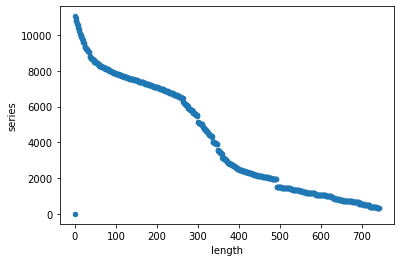

In [9]:

dates=tempLong['period'].unique()
droppedShapes=[]
for date in dates:

    temp=tempLong[tempLong['period'] > date]
    temp=temp.pivot_table(index='period', columns=['ReferenceArea', 'CounterpartReferenceArea'], values='value')
    temp=temp.dropna(axis=1)
    print(temp.shape)
    droppedShapes.append(pd.DataFrame({'date':date, 'length': temp.shape[0], 'series':temp.shape[1]}, index=[date]))

dropDf=pd.concat(droppedShapes)
dropDf.plot.scatter(x='length', y='series')

In [10]:

temp=tempLong[tempLong['period'] > '1980-01-01']
temp=temp.pivot_table(index='period', columns=['ReferenceArea', 'CounterpartReferenceArea'], values='value')
temp.dropna(axis=1, inplace=True)

In [11]:

# for col in temp:
#     # https://stackoverflow.com/a/49573439/11706269
#     plt.plot(temp.index, temp[[col]])
#     ax=plt.gca()
#     ax.xaxis.set_major_locator(mdates.YearLocator(10))
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [12]:

temp=temp.melt(ignore_index=False)
temp.to_csv(product['dotsTimeSeries'])